In [117]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import nltk
from gensim import matutils, models
import scipy.sparse
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from topic_modeling import english_nouns, extract_nouns_en, display_topics
import matplotlib.pyplot as plt

In [2]:
us_df = pickle.load(open("us_df.p", "rb"))
it_df = pickle.load(open("it_df.p", "rb"))

In [89]:
#Custom stop words
english_words = set(nltk.corpus.stopwords.words('english'))
english_words = english_words.union(['mr', 'president', 'thank', 'share', 'page', 'facebook', 'twitter', 'copy', 'clipboard', 'state', 'country', 'governor', 'lot', 'today', 'thing', 'time', 'question', 'day', 'way', 'yeah', 'something', 'nobody', 'vice', 'ha', 'wa'])
italian_words = set(nltk.corpus.stopwords.words('italian'))
italian_words = italian_words.union(['misure', 'quindi', 'già'])

#### 1. Additional pre-processing: part of speech tagging and extracting nouns

In [47]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/annabradleywebb/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
lemmatizer = WordNetLemmatizer()

In [7]:
extract_nouns_en(us_df)

#### 2. Count-vectorizing

In [8]:
#CV with single words, English
cv_1_en = CountVectorizer(stop_words=english_words, ngram_range=(1,1))
X_en_1 = cv_1_en.fit_transform(us_df['nouns_only'])
en_1 = pd.DataFrame(X_en_1.toarray(),columns=cv_1_en.get_feature_names())

In [9]:
#Italian with single words
cv_1_it = CountVectorizer(stop_words=italian_words, ngram_range=(1,1))
X_it_1 = cv_1_it.fit_transform(it_df['noun_text'])
it_1 = pd.DataFrame(X_it_1.toarray(),columns=cv_1_it.get_feature_names())

In [90]:
#English with single words or 2-word n-grams
cv_2_en = CountVectorizer(stop_words=english_words, ngram_range=(1,2))
X_en_2 = cv_2_en.fit_transform(us_df['verb_text'])
en_2 = pd.DataFrame(X_en_2.toarray(),columns=cv_2_en.get_feature_names())

In [73]:
#Italian with single words or 2-word n-grams
cv_2_it = CountVectorizer(stop_words=italian_words, ngram_range=(1,2))
X_it_2 = cv_2_it.fit_transform(it_df['noun_text'])
it_2 = pd.DataFrame(X_it_2.toarray(),columns=cv_2_it.get_feature_names())

#### 3. Trying LDA model on English single words - unclear topics.

In [26]:
doc_word = cv_2_en.transform(us_df.nouns_only).transpose()
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in cv_2_en.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)
lda.print_topics()

[(0,
  '0.002*"task force" + 0.002*"dr birx" + 0.002*"dr fauci" + 0.001*"supply chain" + 0.001*"healthcare worker" + 0.001*"defense production" + 0.001*"secretary mnuchin" + 0.001*"test test" + 0.001*"production act" + 0.001*"york city"'),
 (1,
  '0.001*"york city" + 0.001*"test test" + 0.001*"dr fauci" + 0.001*"dr birx" + 0.001*"healthcare worker" + 0.000*"secretary mnuchin" + 0.000*"task force" + 0.000*"week week" + 0.000*"york area" + 0.000*"healthcare provider"'),
 (2,
  '0.001*"dr fauci" + 0.001*"dr birx" + 0.001*"task force" + 0.001*"healthcare worker" + 0.001*"secretary pompeo" + 0.000*"number number" + 0.000*"test test" + 0.000*"world health" + 0.000*"health organization" + 0.000*"cruise ship"'),
 (3,
  '0.001*"task force" + 0.001*"secretary mnuchin" + 0.001*"dr fauci" + 0.001*"number number" + 0.001*"company company" + 0.000*"supply chain" + 0.000*"test test" + 0.000*"dr birx" + 0.000*"job job" + 0.000*"health service"'),
 (4,
  '0.002*"test test" + 0.002*"dr birx" + 0.002*"ta

In [28]:
doc_word = cv_2_it.transform(it_df.noun_text).transpose()
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in cv_2_it.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)
lda.print_topics()

[(0,
  '0.003*"misure" + 0.002*"governo" + 0.002*"paesi" + 0.002*"essere" + 0.002*"europeo" + 0.002*"aprile" + 0.001*"emergenza" + 0.001*"risposta" + 0.001*"dovrà" + 0.001*"credito"'),
 (1,
  '0.004*"misure" + 0.003*"attività" + 0.003*"governo" + 0.002*"paese" + 0.002*"tutte" + 0.002*"quindi" + 0.002*"essere" + 0.002*"emergenza" + 0.002*"primo" + 0.002*"già"'),
 (2,
  '0.002*"oggi" + 0.001*"sicurezza" + 0.001*"stato" + 0.001*"quindi" + 0.001*"nazionale" + 0.001*"proprio" + 0.001*"prima" + 0.001*"fatto" + 0.001*"tutte" + 0.001*"essere"'),
 (3,
  '0.001*"misure" + 0.000*"governo" + 0.000*"quindi" + 0.000*"stato" + 0.000*"attività" + 0.000*"emergenza" + 0.000*"già" + 0.000*"protezione" + 0.000*"contagio" + 0.000*"primo"'),
 (4,
  '0.004*"misure" + 0.002*"decreto" + 0.002*"governo" + 0.002*"emergenza" + 0.002*"stato" + 0.002*"protezione" + 0.002*"attività" + 0.002*"paese" + 0.001*"sistema" + 0.001*"contagio"')]

#### 4. Trying LSA model on English single words - better topics.

In [122]:
lsa_en_1 = TruncatedSVD(10)
doc_topic_en_1 = lsa_en_1.fit_transform(en_1)
lsa_en_1.explained_variance_ratio_

array([0.38506499, 0.05834345, 0.04770105, 0.03561606, 0.03028468,
       0.02837552, 0.02432459, 0.02384965, 0.02155333, 0.02009942])

In [123]:
display_topics(lsa_en_1, cv_1_en.get_feature_names(), 10)


Topic  1
time, day, number, test, ha, question, way, job, week, ventilator

Topic  2
test, lab, health, capacity, number, testing, laboratory, cdc, phase, vice

Topic  3
secretary, vice, coronavirus, health, supply, pompeo, system, government, department, business

Topic  4
ventilator, supply, hospital, test, vice, business, point, program, order, chain

Topic  5
case, dr, ventilator, area, secretary, number, health, birx, community, world

Topic  6
whitsett, vice, campbell, coronavirus, dr, day, story, area, house, fauci

Topic  7
whitsett, business, money, secretary, campbell, mnuchin, order, story, goldman, test

Topic  8
business, company, vice, year, world, community, percent, industry, energy, home

Topic  9
virus, worker, flu, guideline, mask, phase, fall, face, coronavirus, care

Topic  10
wa, ventilator, time, job, health, student, capacity, school, nobody, leader


#### LSA for all 4 groups of count-vectorized matrices.

In [124]:
lsa_it_1 = TruncatedSVD(6)
doc_topic_it_1 = lsa_it_1.fit_transform(it_1)
lsa_it_1.explained_variance_ratio_

lsa_en_2 = TruncatedSVD(4)
doc_topic_en_2 = lsa_en_2.fit_transform(en_2)
lsa_en_2.explained_variance_ratio_

lsa_it_2 = TruncatedSVD(5)
doc_topic_it_2 = lsa_it_2.fit_transform(it_2)
lsa_it_2.explained_variance_ratio_

array([0.34867578, 0.24377917, 0.19624607, 0.0650535 , 0.03471053])

In [125]:
#Topics for English n-grams
display_topics(lsa_en_2, cv_2_en.get_feature_names(), 20)


Topic  1


IndexError: list index out of range

In [ ]:
#Topics for Italian n-grams
display_topics(lsa_it_2, cv_2_it.get_feature_names(), 10)

In [ ]:
#Topics for Italian single words
display_topics(lsa_it_1, cv_1_it.get_feature_names(), 10)

#### 5. Best topics are from the 1-2 word n-grams, 4 topics for English and 5 for Italian. Here are the general definitions of the topics.

### Italian ###

#### Topic  1: State of emergency and government measures ####

*Italian words*: misure, governo, attività, emergenza, paese, stato, tutte, essere, quindi, già

*Translations*: measures, government, activity, emergency, country, state, all, to be, therefore, already

#### Topic  2: Economic protection ####

*Italian words*: decreto, protezione, sospensione, contagio, sanitario, miliardi, emergenza, febbraio, risorse, euro

*Translations*: decree, protection, suspension, contagion, health, millions, emergency, February, resources, euro

#### Topic  3: Economy ####

*Italian words*: paesi, europeo, aprile, essere, credito, finanziamento, dovrà, linea, risposta, linea credito

*Translations*: countries, European, April, to be, credit, financing, should be, line, response, credit line

#### Topic  4: National security and intelligence ####

*Italian words*: sicurezza, nazionale, relazione, interessi, quali, sempre, dellintelligence, intelligence, presidente, sicurezza nazionale

*Translations*: security, national, relations, interests, which, always, of intelligence, intelligence, president, national security

#### Topic  5: The EU and international relations ####

*Italian words*: italia, massima, altri, attraversando, europa, contagio, ministri, significativo, azioni, europea

*Translations*: Italy, maximum, others, around, Europe, contagion, ministers, meaningful, actions, European

### English ### 

#### Topic  1: Not using ####
state, country, lot, thing, time, governor, day, number, test, ha, question, today, way, job, week, ventilator, case, hospital, vice, health

#### Topic  2 - Supply chains: test manufacturing, testing capacity ####
state, governor, test, vice, lab, supply, capacity, whitsett, health, laboratory, fema, today, phase, state whitsett, slide, government, supply chain, center, chain, wa

#### Topic  3 - Science: tests, the CDC, lab capacity ####
test, number, health, lab, dr, testing, capacity, test test, cdc, laboratory, community, today, phase, week, coronavirus, flu, year, slide, disease, risk

#### Topic  4 - International relations: Mike Pompeo, the State Department, travel, the border ####
secretary, vice, coronavirus, health, pompeo, secretary pompeo, system, department, travel, industry, business, yesterday, government, healthcare, day, border, information, tomorrow, spread, team

#### 6. LSA gave good topics, but the results are not very interpretable in terms of how the topics changed over time. NMF has interpretable topics and interpretable results over time. 

In [109]:
nmf_model = NMF(8)
doc_word = cv_2_en.fit_transform(us_df.nouns_only)
doc_topic_en = nmf_model.fit_transform(doc_word)

In [74]:
nmf_model_it = NMF(5)
doc_word_it = cv_2_it.fit_transform(it_df.noun_text)
doc_topic_it = nmf_model_it.fit_transform(doc_word_it)

In [99]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["ventilator_supply_ny","testing_labs", "state_dept", "economy", "ppe_supplies", "updates_china", "health_cases", "people_stories"],
             columns = cv_2_en.get_feature_names())
topic_word

,aaa,aaa hand,abbot,abbot dr,abbott,abbott abbott,abbott approval,abbott ceo,abbott checkpoint,abbott company,...,zpak doctor,zpak hahn,zpak laboratory,zpak look,zpak lung,zpak subject,zpak zinc,zucker,zucker representative,zucker york
ventilator_supply_ny,0.000,0.000,0.000,0.000,0.752,0.019,0.000,0.000,0.024,0.029,...,0.063,0.009,0.018,0.000,0.033,0.033,0.002,0.00,0.000,0.000
testing_labs,0.002,0.002,0.020,0.020,0.239,0.000,0.001,0.001,0.001,0.003,...,0.000,0.002,0.000,0.002,0.000,0.000,0.001,0.00,0.000,0.000
state_dept,0.000,0.000,0.002,0.002,0.065,0.000,0.000,0.000,0.000,0.013,...,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
economy,0.002,0.002,0.000,0.000,0.074,0.000,0.005,0.000,0.000,0.007,...,0.001,0.000,0.000,0.018,0.000,0.000,0.004,0.00,0.000,0.002
ppe_supplies,0.000,0.000,0.000,0.000,0.117,0.007,0.011,0.014,0.005,0.000,...,0.000,0.009,0.003,0.016,0.000,0.000,0.000,0.04,0.027,0.011
updates_china,0.006,0.006,0.001,0.001,0.081,0.009,0.000,0.000,0.000,0.000,...,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
health_cases,0.007,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.005,0.000,0.000,0.013,0.00,0.000,0.006
people_stories,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,...,0.000,0.000,0.001,0.000,0.002,0.002,0.000,0.00,0.000,0.000


In [108]:
topic_word_it = pd.DataFrame(nmf_model_it.components_.round(3),
             index = ["lockdown_reopening","emergency_orders", "economy", "national_security", "ignore"],
             columns = cv_2_it.get_feature_names())
topic_word_it

,abbandonato,abbandonato genova,abbandonato stato,abbassare,abbassare guardia,abbassata,abbassata aumento,abbattere,abbattere lascia,abbracciarci,...,zona unica,zone,zone alto,zone dato,zone dovesse,zone forniva,zone maggiormente,zone rosse,zootecnico,zootecnico trasformazione
lockdown_reopening,0.003,0.002,0.001,0.000,0.000,0.12,0.12,0.002,0.002,0.004,...,0.004,0.116,0.000,0.000,0.12,0.000,0.000,0.000,0.004,0.004
emergency_orders,0.004,0.002,0.003,0.000,0.000,0.00,0.00,0.002,0.002,0.003,...,0.003,0.464,0.077,0.077,0.00,0.000,0.155,0.155,0.003,0.003
economy,0.002,0.001,0.001,0.000,0.000,0.00,0.00,0.001,0.001,0.001,...,0.001,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.001,0.001
national_security,0.006,0.005,0.002,0.113,0.113,0.00,0.00,0.005,0.005,0.005,...,0.005,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.005,0.005
ignore,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.000,0.308,0.062,0.000,0.00,0.062,0.062,0.123,0.000,0.000


In [100]:
display_topics(nmf_model, cv_2_en.get_feature_names(), 15)


Topic  1
ventilator, case, area, number, york, week, job, hospital, dr, world, fauci, virus, worker, birx, place

Topic  2
test, number, week, health, lab, capacity, testing, dr, hospital, point, phase, system, test test, laboratory, job

Topic  3
secretary, pompeo, secretary pompeo, border, coronavirus, virus, health, number, department, world, system, case, travel, work, team

Topic  4
business, secretary, ventilator, supply, money, order, mask, job, government, hospital, worker, case, week, percent, mnuchin

Topic  5
company, job, mask, hospital, york, supply, test, number, virus, please, government, week, fema, drug, business

Topic  6
number, year, world, job, test, case, week, business, company, decision, china, community, health, doctor, money

Topic  7
coronavirus, dr, health, number, virus, home, case, community, house, birx, worker, yesterday, week, test, world

Topic  8
whitsett, campbell, story, doctor, goldman, disease, hospital, kind, patel, year, right, wife, representa

*Topic  1: Ventilator supply and New York*

ventilator, case, area, number, york, week, job, hospital, dr, world, fauci, virus, worker, birx, place

*Topic  2: Testing and lab capacity*

test, number, week, health, lab, capacity, testing, dr, hospital, point, phase, system, test test, laboratory, job

*Topic  3: State Department and international relations*

secretary, pompeo, secretary pompeo, border, coronavirus, virus, health, number, department, world, system, case, travel, work, team

*Topic  4: Economy*

business, secretary, ventilator, supply, money, order, mask, job, government, hospital, worker, case, week, percent, mnuchin

*Topic  5: PPE, supplies*

company, job, mask, hospital, york, supply, test, number, virus, please, government, week, fema, drug, business

*Topic  6: Numbers/updates, China*

number, year, world, job, test, case, week, business, company, decision, china, community, health, doctor, money

*Topic  7: health, cases*

coronavirus, dr, health, number, virus, home, case, community, house, birx, worker, yesterday, week, test, world

*Topic  8: people and stories*

whitsett, campbell, story, doctor, goldman, disease, hospital, kind, patel, year, right, wife, representative, virus, guy


In [95]:
display_topics(nmf_model_it, cv_2_it.get_feature_names(), 15)


Topic  1
attività, governo, tutte, paese, fase, essere, primo, cittadini, emergenza, vita, solo, particolare, riapertura, volta, ancora

Topic  2
decreto, governo, emergenza, protezione, stato, sistema, lavoro, giorni, cittadini, attività, paese, imprese, nazionale, sanitario, dobbiamo

Topic  3
paesi, essere, governo, europeo, aprile, risposta, emergenza, dovrà, credito, solo, linea, europea, finanziamento, italia, dobbiamo

Topic  4
sicurezza, nazionale, sempre, relazione, volta, quali, stato, tutte, interessi, presidente, sistema, solo, prima, proprio, intelligence

Topic  5
emergenza, governo, stato, decreto, paese, contagio, italia, sistema, protezione, sanitario, attività, imprese, nazionale, risorse, cittadini


*Topic  1: lockdown, phases and reopening*

Italian: attività, governo, tutte, paese, fase, essere, primo, cittadini, emergenza, vita, solo, particolare, riapertura, volta, ancora

Translation: activity, government, all, country, phases, to be, first, citizens, emergency, life, alone, particular, reopening, time, again

*Topic  2: emergency orders*

Italian: decreto, governo, emergenza, protezione, stato, sistema, lavoro, giorni, cittadini, attività, paese, imprese, nazionale, sanitario, dobbiamo

Translation: decree, government, emergency, protection, state, system, work, days, citizens, activity, country, businesses, national, health, we must

*Topic  3: economy*

Italian: paesi, essere, governo, europeo, aprile, risposta, emergenza, dovrà, credito, solo, linea, europea, finanziamento, italia, dobbiamo

Translation: countries, to be, government, European, April, response, emergency, will be able to, credit, alone, line, European, financing, Italy, we must

*Topic  4: national security*

Italian: sicurezza, nazionale, sempre, relazione, volta, quali, stato, tutte, interessi, presidente, sistema, solo, prima, proprio, intelligence

Translation: security, national, always, relations, time, which, state, all, interests, president, system, alone, first, proper, intelligence

*Topic  5: disregard, general*

Italian: emergenza, governo, stato, decreto, paese, contagio, italia, sistema, protezione, sanitario, attività, imprese, nazionale, risorse, cittadini

Translation: emergency, government, state, decree, country, contagion, Italy, system, protection, health, activities, businesses, national, resources, citizens

In [110]:
doc_topic_en = pd.DataFrame(doc_topic_en.round(5),
             index = us_df.Date,
             columns = ["ventilator_supply_ny","testing_labs", "state_dept", "economy", "ppe_supplies", "updates_china", "health_cases", "people_stories"])
doc_topic_en

,ventilator_supply_ny,testing_labs,state_dept,economy,ppe_supplies,updates_china,health_cases,people_stories
Date,,,,,,,,
2020-04-30,0.57529,0.84905,0.00000,0.00000,0.41381,0.75407,0.00000,0.04395
2020-04-28,0.40840,1.46814,0.00000,0.42690,0.22560,0.66781,0.78551,0.00000
2020-04-27,0.00000,5.15464,0.09363,0.00000,0.81089,1.54136,0.00000,0.00000
2020-04-27,0.00000,3.14231,0.00000,0.20410,0.39472,0.00000,0.00000,0.00000
2020-04-27,0.00000,0.42692,0.00015,0.00000,0.12319,0.13494,0.11735,0.00000
...,...,...,...,...,...,...,...,...
2020-03-06,0.14423,0.00000,0.00000,0.01026,0.38548,0.04197,0.27807,0.04291
2020-03-06,0.00000,0.83821,0.15830,0.00000,0.20218,0.55343,0.00000,0.00000
2020-03-04,0.05130,0.28808,0.36782,0.12927,0.13236,0.78996,1.25348,0.10816


In [143]:
doc_topic_en.sort_values(by=['economy'])

,ventilator_supply_ny,testing_labs,state_dept,economy,ppe_supplies,updates_china,health_cases,people_stories
Date,,,,,,,,
2020-04-30,0.57529,0.84905,0.00000,0.00000,0.41381,0.75407,0.00000,0.04395
2020-04-01,0.00000,0.09836,2.84972,0.00000,4.37114,4.54407,0.20057,0.78548
2020-03-30,1.18862,1.19119,0.00000,0.00000,4.48533,0.00000,0.00000,0.00000
2020-03-30,3.12644,1.73311,0.00000,0.00000,3.97859,1.67899,0.00000,0.00000
2020-03-03,0.12225,0.04466,0.37085,0.00000,0.00000,0.00000,0.27212,0.05957
...,...,...,...,...,...,...,...,...
2020-03-25,1.99945,0.00000,0.17602,1.60773,1.84805,0.37735,2.47116,0.00000
2020-04-24,0.00000,0.00000,0.40162,1.92928,0.38712,1.94360,0.00000,0.38484
2020-04-14,6.59472,3.04475,2.94889,3.22686,0.00000,0.00000,0.00000,0.00000


In [112]:
doc_topic_it = pd.DataFrame(doc_topic_it.round(5),
             index = it_df.Date,
             columns = ["lockdown_reopening","emergency_orders", "economy", "national_security", "ignore"])
doc_topic_it


,lockdown_reopening,emergency_orders,economy,national_security,ignore
Date,,,,,
"Giovedì, 30 Aprile 2020",8.56042,0.00000,0.00000,0.11899,0.00000
"Giovedì, 30 Aprile 2020",8.10167,0.00000,0.00000,0.00000,0.08427
"Martedì, 28 Aprile 2020",0.23797,0.26537,0.19775,0.35775,0.00000
"Martedì, 21 Aprile 2020",0.02122,0.00000,9.35017,0.02892,0.00000
"Martedì, 21 Aprile 2020",0.00000,0.00000,9.05462,0.00000,0.00000
"Giovedì, 26 Marzo 2020",0.00000,12.85001,0.00000,0.00000,0.00000
"Mercoledì, 25 Marzo 2020",0.00000,0.01578,0.00000,0.00000,16.18471
"Sabato, 21 Marzo 2020",0.32348,0.37064,0.11536,0.23699,0.18056
"Lunedì, 16 Marzo 2020",0.17868,0.45811,0.13122,0.12062,0.13100


#### Locating documents with highest occurence of "economy" topics from both corpuses to compare

In [128]:
high_economy = it_df[it_df['Date']=='Martedì, 21 Aprile 2020']

In [139]:
pd.set_option('display.max_colwidth', -1)

/Users/annabradleywebb/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [144]:
us_df[us_df['Date']=='2020-04-03']

_id  \
31  5ebc44476d236a15bfc20bec   
32  5ebc44476d236a15bfc20bed   
33  5ebc44476d236a15bfc20bee   

                                                                                                                                                    \
31  https://www.whitehouse.gov/briefings-statements/remarks-president-trump-vice-president-pence-members-coronavirus-task-force-press-briefing-18/   
32  https://www.whitehouse.gov/briefings-statements/remarks-president-trump-meeting-energy-sector-ceos/                                              
33  https://www.whitehouse.gov/briefings-statements/remarks-president-trump-vice-president-pence-members-coronavirus-task-force-press-briefing-17/   

                                                                                                           Header  \
31  Remarks by President Trump, Vice President Pence, and Members of the Coronavirus Task Force in Press Briefing   
32  Remarks by President Trump in Meeting with Energy Sector CEOs                                                   
33  Remarks by President Trump, Vice President Pence, and Members of the Coronavirus Task Force in Press Briefing   

         Date  \
31 2020-04-03   
32 2020-04-03   
33 2020-04-03   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [142]:
print(high_economy.iloc[1::])

                        _id  \
4  5ebc44bde202cde3630b30c3   

                                                                                                \
4  http://www.governo.it/it/articolo/covid-19-informativa-del-presidente-conte-al-senato/14500   

                                                 Header  \
4  Covid-19, informativa del Presidente Conte al Senato   

                      Date  \
4  Martedì, 21 Aprile 2020   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [115]:
doc_topic_it.to_csv('doc_topic_it.csv')
doc_topic_en.to_csv('doc_topic_en.csv')

In [116]:
doc_topic_en

,ventilator_supply_ny,testing_labs,state_dept,economy,ppe_supplies,updates_china,health_cases,people_stories
Date,,,,,,,,
2020-04-30,0.57529,0.84905,0.00000,0.00000,0.41381,0.75407,0.00000,0.04395
2020-04-28,0.40840,1.46814,0.00000,0.42690,0.22560,0.66781,0.78551,0.00000
2020-04-27,0.00000,5.15464,0.09363,0.00000,0.81089,1.54136,0.00000,0.00000
2020-04-27,0.00000,3.14231,0.00000,0.20410,0.39472,0.00000,0.00000,0.00000
2020-04-27,0.00000,0.42692,0.00015,0.00000,0.12319,0.13494,0.11735,0.00000
...,...,...,...,...,...,...,...,...
2020-03-06,0.14423,0.00000,0.00000,0.01026,0.38548,0.04197,0.27807,0.04291
2020-03-06,0.00000,0.83821,0.15830,0.00000,0.20218,0.55343,0.00000,0.00000
2020-03-04,0.05130,0.28808,0.36782,0.12927,0.13236,0.78996,1.25348,0.10816


In [121]:
doc_topic_it

,lockdown_reopening,emergency_orders,economy,national_security,ignore
Date,,,,,
"Giovedì, 30 Aprile 2020",8.56042,0.00000,0.00000,0.11899,0.00000
"Giovedì, 30 Aprile 2020",8.10167,0.00000,0.00000,0.00000,0.08427
"Martedì, 28 Aprile 2020",0.23797,0.26537,0.19775,0.35775,0.00000
"Martedì, 21 Aprile 2020",0.02122,0.00000,9.35017,0.02892,0.00000
"Martedì, 21 Aprile 2020",0.00000,0.00000,9.05462,0.00000,0.00000
"Giovedì, 26 Marzo 2020",0.00000,12.85001,0.00000,0.00000,0.00000
"Mercoledì, 25 Marzo 2020",0.00000,0.01578,0.00000,0.00000,16.18471
"Sabato, 21 Marzo 2020",0.32348,0.37064,0.11536,0.23699,0.18056
"Lunedì, 16 Marzo 2020",0.17868,0.45811,0.13122,0.12062,0.13100


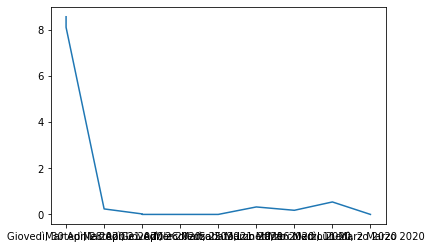

In [120]:
plt.plot(doc_topic_it.lockdown_reopening)